# Intelligente systemer: Convolutional Neural Networks (CNN)
Welcome to this notebook which is part of Kristiania University College's course «Utvikling og anvendelse av intelligente systemer», module 5, «Dyp læring og overføringslæring».

## How to use this notebook
This is a Jupyter notebook with text and Python code that you run by pressing shift-enter. The purpose is to become familiar with relevant concepts in practice, not necessarily to understand all the details of the code. Take the time to read the text, review the code, run the code cells (make sure they are in the correct order), study the results, and think about what we do, why and how.

At the end of this notebook, you will find three self-test questions _in italics_. Go to Canvas and answer the questions after completing the notebook.

## The problem: Handwritten digit classification using Keras
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

## Dataset information
We will use a famous dataset for handwritten digit classification, called the MNIST (Modified National Institue of Standards and Technology) dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. 

##### MNIST Dataset Example:

![MNIST Dataset Example](figures/mnist-dataset-example.png)

## 1. Importing Libraries

In this notebook we'll need:

- `tensorflow`, and `keras`  for model training
- `matplotlib` for data visualisation. 


In [3]:
# Note: There is a bug on some systems that may affect this notebook.
# If you get a «Kernel Restarting» error message when running this notebook,
# uncomment the code below (i.e. remove the hash signs in the beginning of the
# code lines). Then restart the kernel and rerun the entire notebook from here.

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

## 2. Loading the dataset from Keras

Some of the famous datasets used by ML and DL community can be found on Keras directly.

In [5]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 3. Visualizing a few digits from the dataset

In [6]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Based on the code cell above, we can infer that the images are stored in Numpy tensors of the shape (60000, 28, 28) for the training data, and the shape (10000, 28, 28) for test data, respectively.

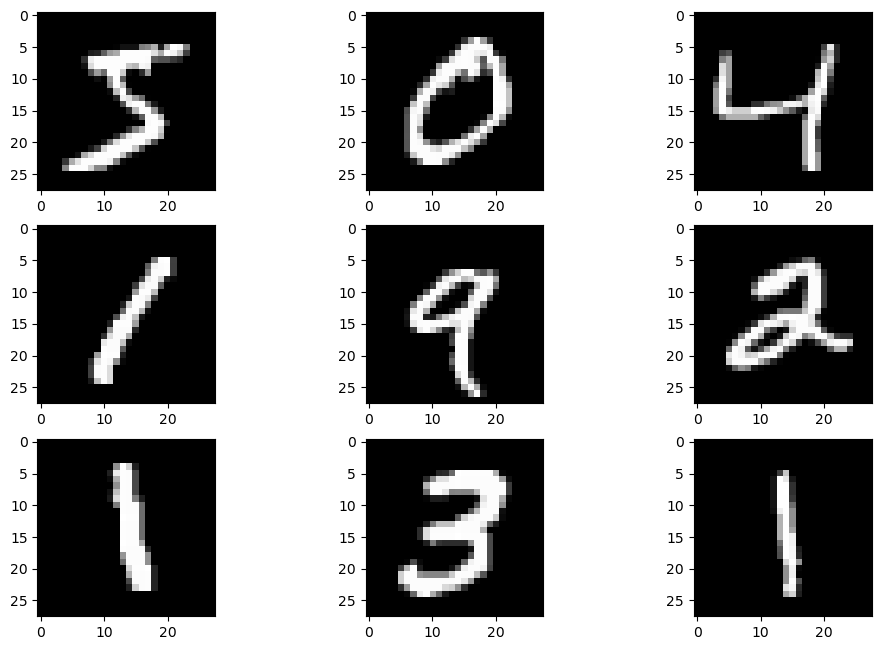

In [7]:
fig=plt.figure(figsize=(12,8), dpi= 100)
## plot first nine images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    
## show the figure
plt.show()

In the above cell you see the first 9 images in our dataset being diplayed.

In [8]:
train_labels[1]

0

## 4. Defining the model using Keras

Now once we have uploaded our dataset, the nest step is to define the architecture of our CNN.

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

> Did you get a «Kernel Restarting» error message here? If so, go to the first code cell of this notebook, uncomment the code, restart the kernel, and try again. If that doesn't work, contact your supervisor.

Importantly, a Convolutional Neural Network takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In this case, we will configure the network to process inputs of size (28, 28, 1), which is the format of the MNIST images. We will do this by passing the argument `input_shape=(28, 28, 1)` to the first layer.

Let us display the architecture of the network so far:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The height and width dimensions tend to shrink as you go deeper into the network. The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

The next step is to feed the last output tensor (of shape (3, 3, 64)) into a densely connected classifier network like those you’re already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers on top.

## 5. Adding a classifier on top of the CNN

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We will do a 10-way classification, using a final layer with 10 outputs and a softmax activation. Here is what the network looks like now:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

As you can see, the (3, 3, 64) outputs are flattened into vectors of shape (576,) before going through two Dense layers.

## 6. Compiling and fitting the model on the training data
We will now train the Convolutional Neural Network on the MNIST digits.

In [13]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Now is the time to compile the model. During this step we specify the following:
1. `optimizer='rmsprop'` – specifies that we want to use rmsprop optimization during training. 
2. `loss=categorical_crossentropy` – the loss function we want to use, in this case is the [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) used in categorical classification. 
3. `metrics=['accuracy']` – sets which metrics to track during training. 

In [14]:
# compiling model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Now, let's train the model by calling `.fit()`. All we need to pass is train_images and associated labels, the number of iterations (epochs) and the batch size. These are defined as:

- **Epochs**: The number of times the weights in the network will be updated. The value should be large enough for the network to converge (minimize loss to a stable level). If you run the training again without redefining the network, the training will continue from the previous session.

- **Batch size**: Determines the number of samples for cross-validation. Generally you should use as small a batch size as patience/available computing time allows for.

In [15]:
# fitting model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 27s 27ms/step - loss: 0.1695 - accuracy: 0.9474
Epoch 2/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0339 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0257 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0196 - accuracy: 0.9939


## 7. Evaluating the model performance on the validation data

In [14]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(f'Validation loss: {round(val_loss*100, 4)}%\nTest accuracy: {round(val_acc*100, 4)}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0272 - accuracy: 0.9920
Validation loss: 2.7152%
Test accuracy: 99.2%


The test accuracy on our dataset was 99 % which is very good :). This means that our CNN model has correctly classified 99 % of the total handwritten digits in the test dataset.

## Self-test questions

_Oppgave: Svar på flervalgsspørsmålene 1–3 (vist nedenfor) i Canvas._

1. _According to the content provided in the notebook, what is the shape of the training data?_
2. _How many trainable parameters does the CNN have in total?_
3. _Which optimizer has been used to compile the model?_